# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('Categorical.csv')
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [3]:
raw_data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data_mapped = raw_data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America': 0, 'Asia': 1, 'Africa': 2, 'Europe':3, 
                                                         'South America':4, 'Oceania': 5, 'Antarctica':6, 
                                                         'Seven seas (open ocean)': 7})
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3


## Select the features

In [5]:
x = data_mapped.iloc[:, 3:]
x.head()

,continent
0,0
1,1
2,2
3,0
4,3


### WCSS (within cluster sum of squares)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(8)
kmeans.fit(x)
kmeans.inertia_

6.633210877260742e-29

In [7]:
wcss = []
max_cluster_num = 9     # maximum no.of clusters we want + 1, here 9 as 8 continents
for i in range(1, max_cluster_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[722.5311203319502,
 240.2344827586207,
 93.74558050645007,
 56.69175269175269,
 33.33821733821733,
 9.32132132132132,
 0.8888888888888888,
 6.633210877260742e-29]

### The Elbow Method

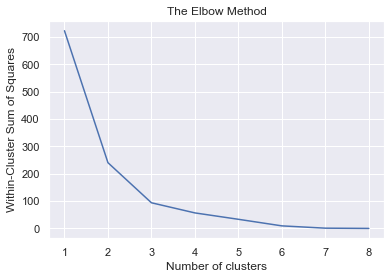

In [9]:
plt.plot(range(1,max_cluster_num), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

## Clustering

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(7)

## Clustering results

In [11]:
data_mapped['Clusters'] = kmeans.fit_predict(x)

## Plot the data

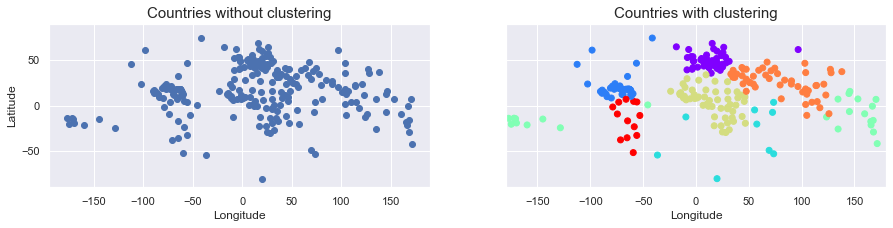

In [12]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,3))
ax[0].scatter(data_mapped['Longitude'], data_mapped['Latitude'])
ax[0].set_title('Countries without clustering', size=15)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].scatter(data_mapped['Longitude'], data_mapped['Latitude'], c=data_mapped['Clusters'], cmap='rainbow')
ax[1].set_title('Countries with clustering', size=15)
ax[1].set_xlabel('Longitude')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()